# Google Trends EDA

## Set Up
Installing necessary packages and importing modules.

In [2]:
#make sure API package is installed, uncomment if not
#!pip install pytrends --user

import pandas as pd
import numpy as np
import time


#for plotting
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)

import plotly.express as px

#apis for data
from pytrends.request import TrendReq

#words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

Querying the API and making the list of terms we want searched.

In [36]:
pytrends = TrendReq()
artists = ["BTS", "Taylor Swift", "Justin Bieber"]

# pytrends.build_payload(kw_list = artists, cat = 3, timeframe = 'all', geo = '')
pytrends.build_payload(kw_list = artists, timeframe = 'all', geo = '')

Make list of the timeframes we're looking at for the hastag trends and album releases.

In [18]:
#make list of timeframes

hashtag_timeframes = ['2020-06-01 2020-06-18',
                      '2020-06-20 2020-07-04',
                      '2021-01-18 2021-02-01']

bts_timeframes = ['2014-08-17 2014-08-31',
                 '2018-05-16 2018-05-30',
                 '2020-11-18 2020-12-02']

ts_timeframes = ['2014-10-25 2014-11-08',
                '2017-11-08 2017-11-22',
                '2020-07-22 2020-08-05']

jb_timeframes = ['2012-06-13 2012-06-27',
                '2015-11-11 2015-11-25',
                '2020-02-12 2020-02-26']

music_timeframes = [bts_timeframes, ts_timeframes, jb_timeframes]

artist_albums = ['BTS', 'Taylor Swift', 'Justin Bieber']

### Time-Based Trend Data

Get the overall monthly trend data (monthly) from earliest start period possible.

In [37]:
overall_monthly = pytrends.interest_over_time()

overall_monthly.drop('isPartial', inplace = True, axis = 1)

overall_monthly.reset_index(inplace = True)

overall_monthly = overall_monthly.melt(id_vars = ['date'],
                    var_name = 'Artist',
                    value_name = 'Popularity')

overall_monthly.head()

,date,Artist,Popularity
0,2004-01-01,BTS,7
1,2004-02-01,BTS,7
2,2004-03-01,BTS,9
3,2004-04-01,BTS,7
4,2004-05-01,BTS,7


In [38]:
overall_monthly.groupby('Artist').agg({
    'Popularity': ['mean', 'median', pd.Series.mode, 'count',
                  'max', 'min', 'std', 'var', 'skew', pd.DataFrame.kurt]
})

Popularity                                                    \
                    mean median mode count  max min        std         var   
Artist                                                                       
BTS            13.859223    7.0    5   206   53   3  13.897344  193.136183   
Justin Bieber  23.747573   14.0    0   206  100   0  26.037391  677.945726   
Taylor Swift   13.354369   12.5    0   206   46   0  10.529200  110.864054   

                                   
                   skew      kurt  
Artist                             
BTS            1.358709  0.396115  
Justin Bieber  1.086532  0.360643  
Taylor Swift   0.710524  0.064329

### Region-based Trend Data

In [8]:
#country codes
codes = px.data.gapminder().query("year==2007")[['country', 'iso_alpha']]

In [18]:
overall_regions = pytrends.interest_by_region()

overall_regions.columns.name = "Artist"
overall_regions.head()

Artist,BTS,Taylor Swift,Justin Bieber
geoName,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
American Samoa,0,0,0
Andorra,0,0,0


In [ ]:
def replace_country(country):
    try:
        code = codes.loc[codes['country'] == country]
        code = code['iso_alpha'].iloc[0]
        return code
    except:
        return None

regions_w_code = overall_regions.copy()
regions_w_code['countryCode'] = regions_w_code.apply(lambda x: replace_country(x.name), axis = 1)
regions_w_code = regions_w_code.dropna(subset = ['countryCode'])
regions_w_code.head()

## Seaborn Plotting - Popularity

### Overall Monthly Popularity

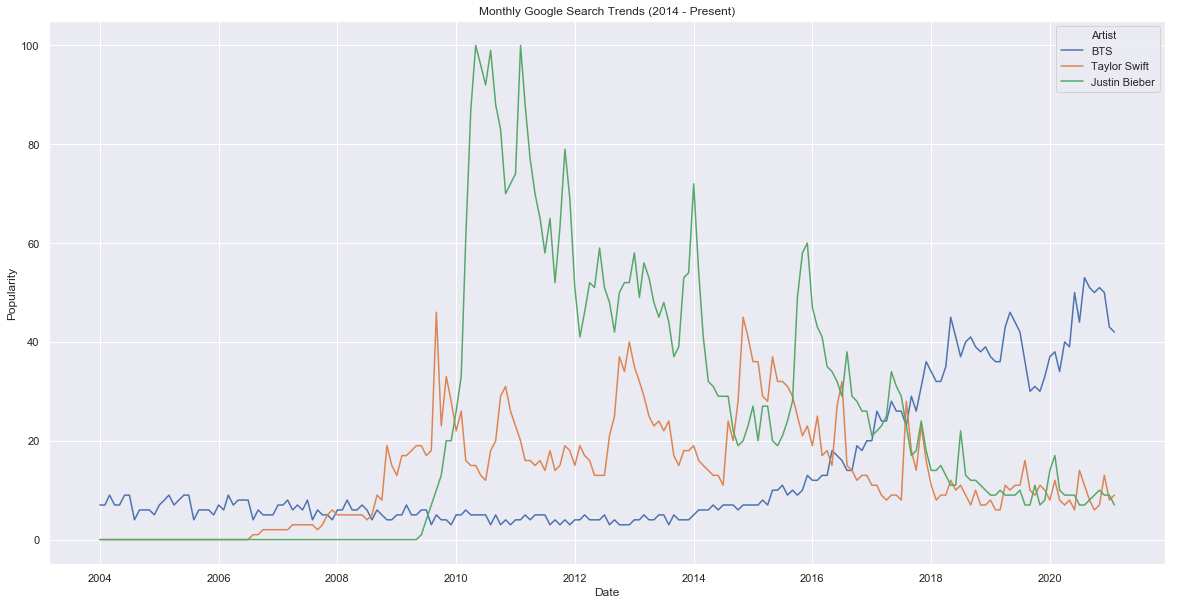

In [39]:
g = sns.lineplot(data = overall_monthly, x = 'date', y = 'Popularity',
                 hue = 'Artist', dashes = False)
g.set_title('Monthly Google Search Trends (2014 - Present)')
g.set(xlabel = 'Date')

plt.savefig('graphs/popularity_all.png', dpi=300)

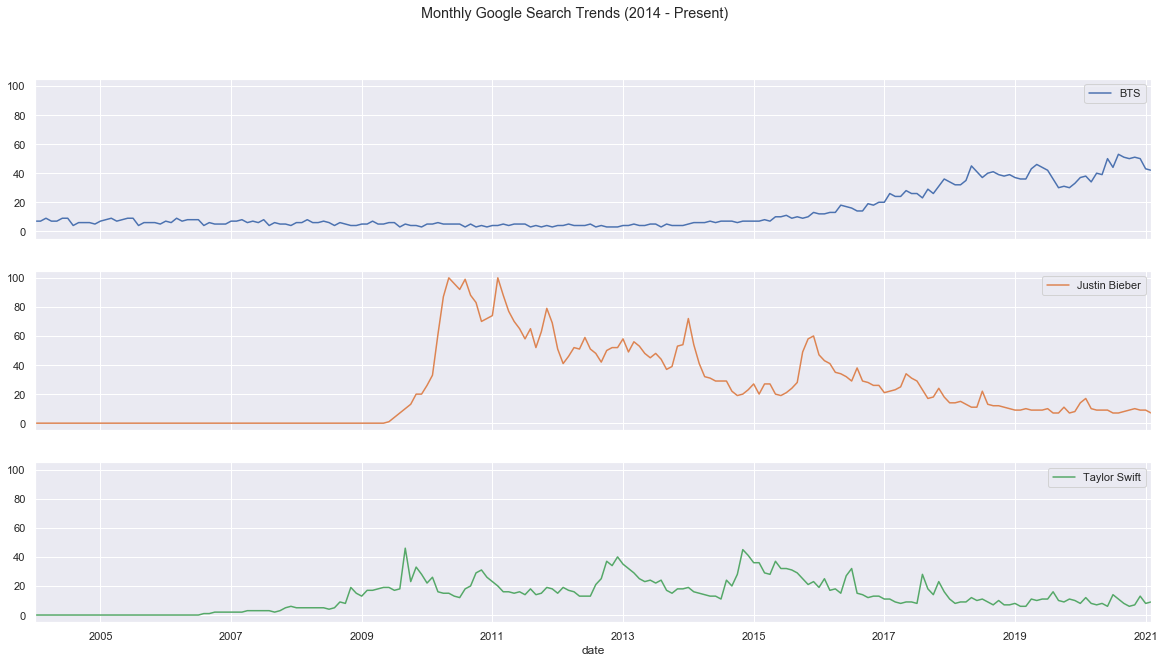

In [40]:
pd.pivot_table(overall_monthly,
               index='date', columns='Artist', values='Popularity'
              ).plot(subplots=True,
                    title = 'Monthly Google Search Trends (2014 - Present)',
                    sharey = True)
plt.savefig('graphs/popularity_split.png', dpi=300)

### Timeframe Plotting Popularity

graphs/BTS_2014-08-17_2014-08-31.png


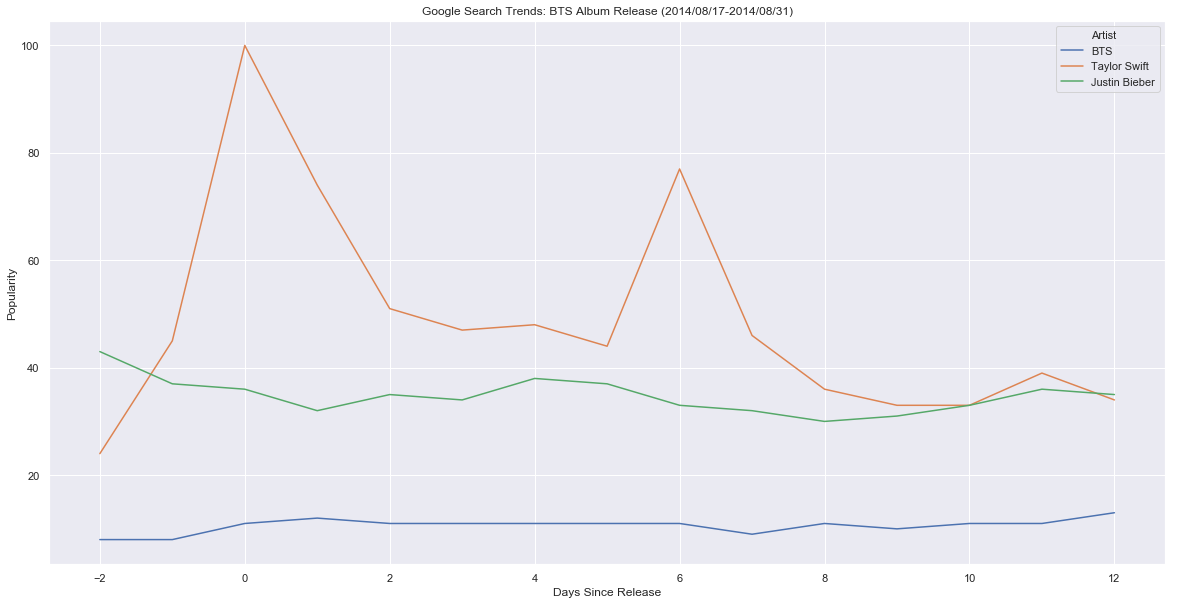

graphs/BTS_2018-05-16_2018-05-30.png


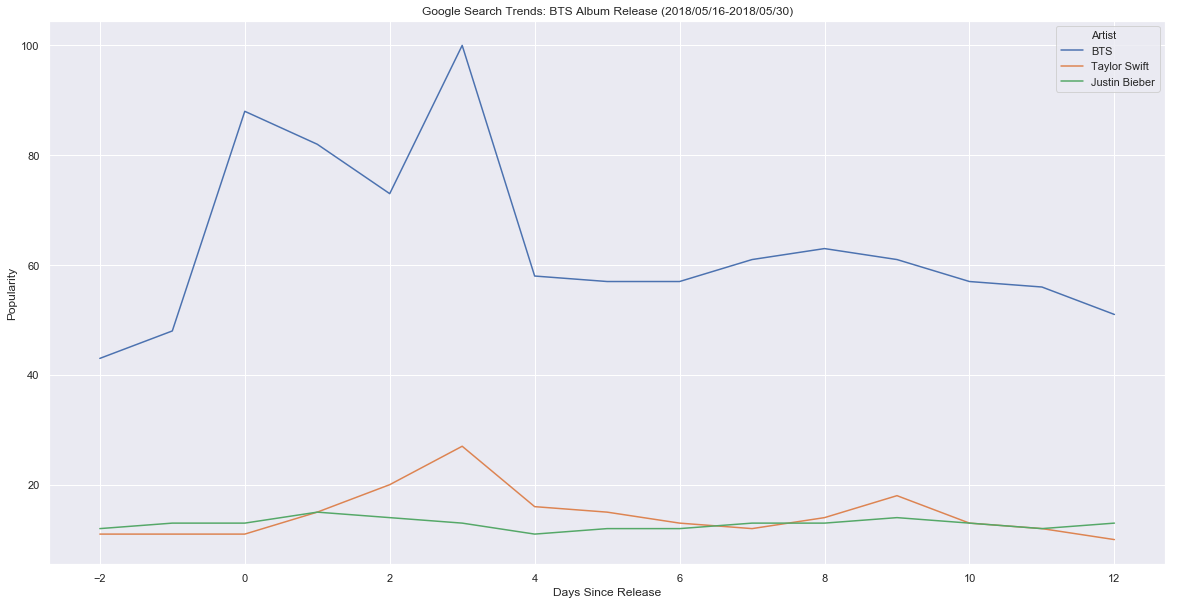

graphs/BTS_2020-11-18_2020-12-02.png


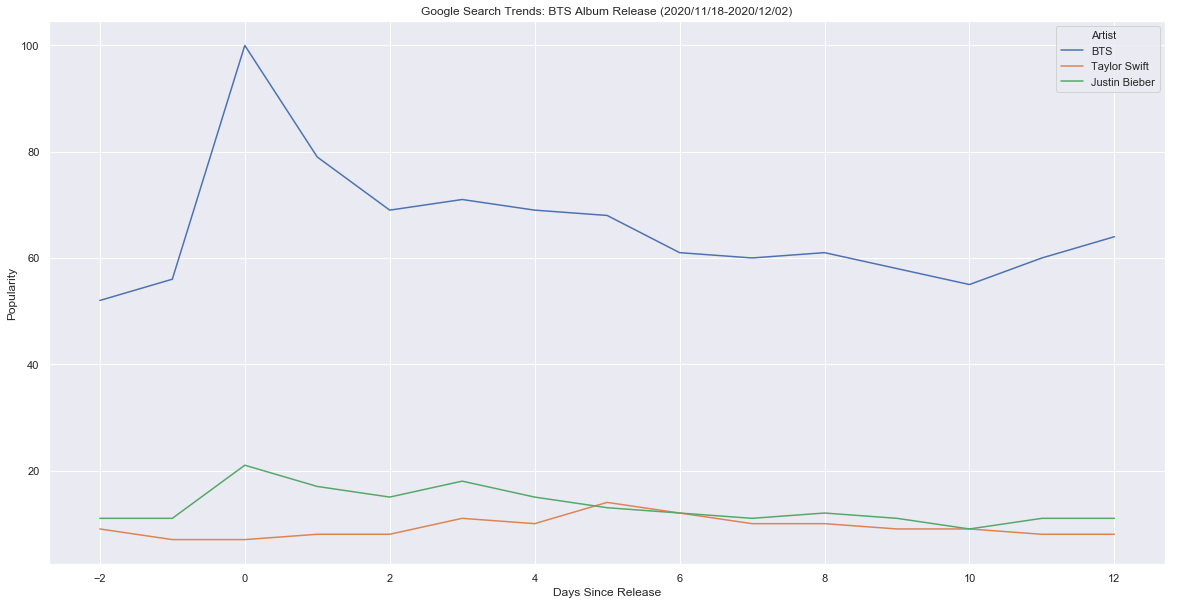

graphs/Taylor Swift_2014-10-25_2014-11-08.png


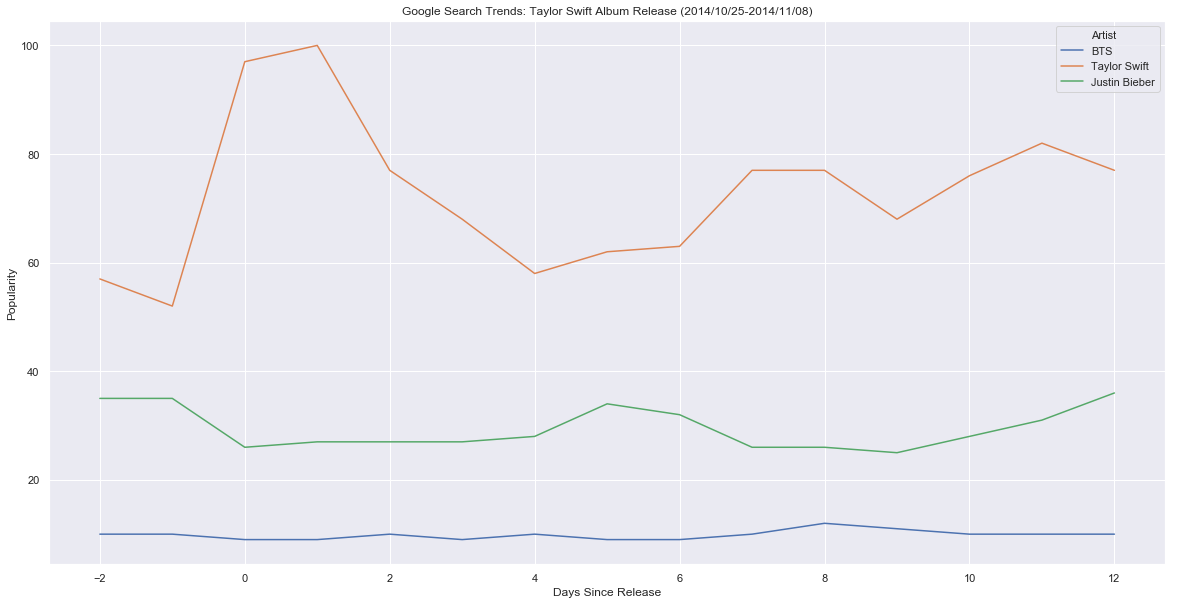

graphs/Taylor Swift_2017-11-08_2017-11-22.png


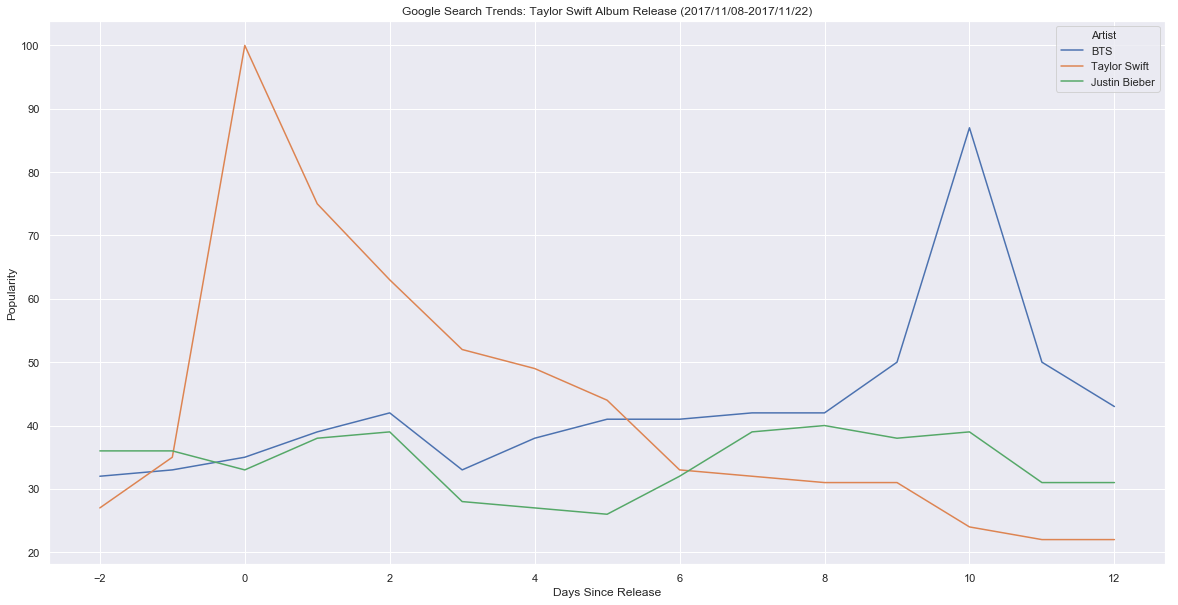

graphs/Taylor Swift_2020-07-22_2020-08-05.png


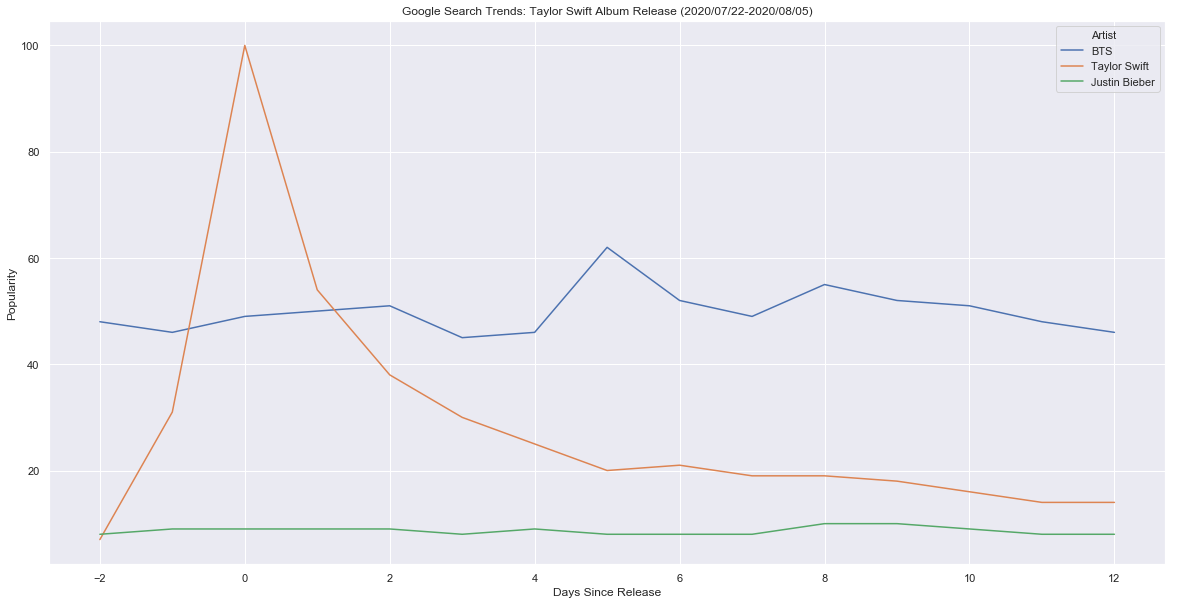

graphs/Justin Bieber_2012-06-13_2012-06-27.png


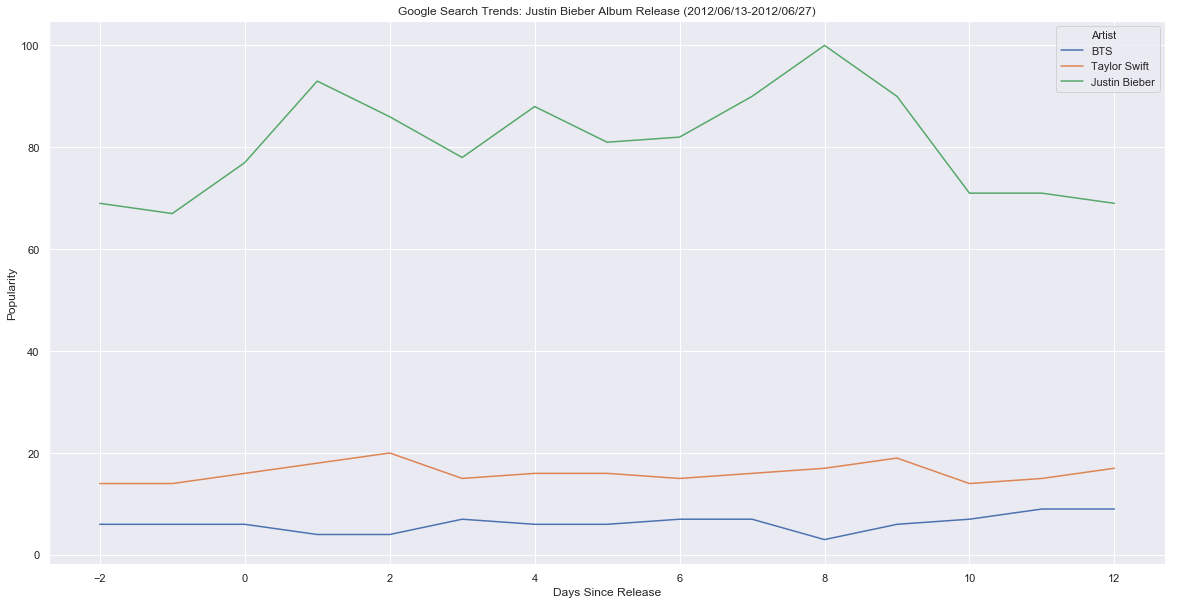

graphs/Justin Bieber_2015-11-11_2015-11-25.png


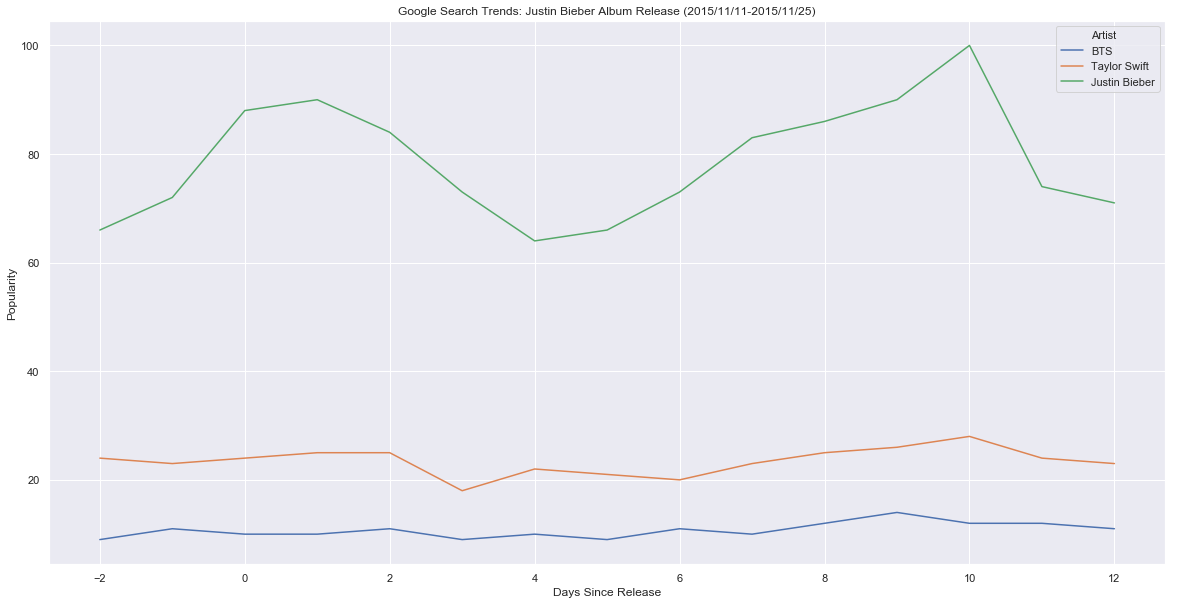

graphs/Justin Bieber_2020-02-12_2020-02-26.png


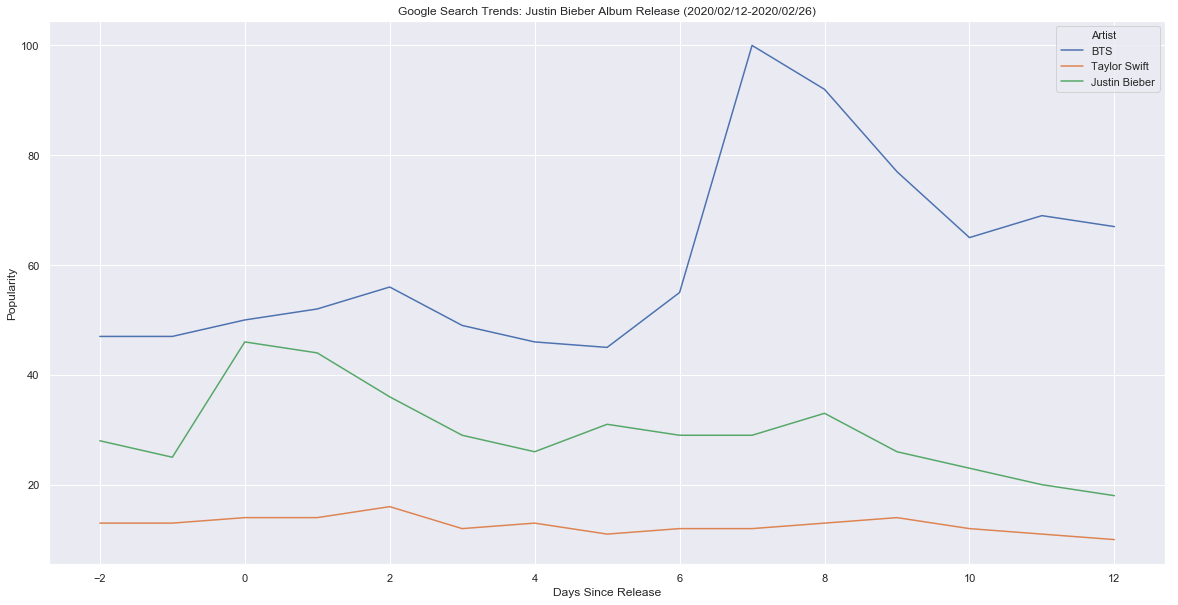

In [41]:
c = 0
df_list = []

for albums in music_timeframes:
    for dates in albums:
        while True:
            try:
#                 pytrends.build_payload(kw_list = artists, cat = 3, timeframe = dates) 
                pytrends.build_payload(kw_list = artists, timeframe = dates) 

                ranged = pytrends.interest_over_time()

                ranged.drop('isPartial', inplace = True, axis = 1)
                ranged.reset_index(inplace = True)

                ranged = ranged.melt(id_vars = ['date'],
                                    var_name = 'Artist',
                                    value_name = 'Popularity')
                df_list.append(ranged)

                #labels

                date_labels = dates.split(' ')

                file_name = 'graphs/' + artist_albums[c] + '_' +\
                date_labels[0] + '_' + date_labels[1] +\
                '.png'
                
                print(file_name)

                date_labels[0] = date_labels[0].replace('-', '/')
                date_labels[1] = date_labels[1].replace('-', '/')


                title_text = 'Google Search Trends: ' + artist_albums[c] +\
                ' Album Release (' + date_labels[0] + '-' + date_labels[1] + ')'

                #plotting
                
                labels = np.arange(-2, 13, 1)
                labels = np.tile(labels, 3)
                
#                 labels = np.arange(-2, 13, 1)

                ranged['Days Since Release'] = labels

                g = sns.lineplot(data = ranged, x = 'Days Since Release', y = 'Popularity',
                         hue = 'Artist', dashes = False)

                #g.xaxis.set_major_locator(ticker.MaxNLocator(nbins = 8))

                g.set_title(title_text)
                #g.set(xlabel = 'Date')

                plt.savefig(file_name, dpi=300)

        
#                 g = sns.lineplot(data = ranged, x = 'date', y = 'Popularity',
#                           hue = 'Artist', dashes = False)

#                 g.set(xlabel = 'Days Since Release')
#                 g.set(ylabel = 'Popularity')
                
#                 plt.savefig(file_name, dpi=300)

                plt.show()
                
                break
            except:
                time.sleep(12)
                continue
                
    c += 1
    time.sleep(12)

In [42]:
big_df = pd.DataFrame()
big_df['Artist'] = df_list[0]['Artist']

artist_c = 0
timeframe_c = 1

for i in range(len(df_list)):
    if timeframe_c == 4:
        artist_c += 1
        timeframe_c = 1
        
    col = artist_albums[artist_c] + ' album ' + str(timeframe_c)
    
    big_df[col] = df_list[i]['Popularity']
    
    timeframe_c += 1

In [43]:
days = np.tile(np.arange(-2, 13), 3)
big_df['Day'] = days
big_df

big_df = big_df.rename(columns = {
    'BTS album 1': 'BTS - Dark and Wild',
    'BTS album 2': 'BTS - Love Yourself: Tear',
    'BTS album 3': 'BTS - Be',
    'Taylor Swift album 1': 'Taylor Swift - 1989',
    'Taylor Swift album 2': 'Taylor Swift - Reputation',
    'Taylor Swift album 3': 'Taylor Swift - Folklore',
    'Justin Bieber album 1': 'Justin Bieber - Believe',
    'Justin Bieber album 2': 'Justin Bieber - Purpose',
    'Justin Bieber album 3': 'Justin Bieber - Changes'
})

big_df.head(3)

,Artist,BTS - Dark and Wild,BTS - Love Yourself: Tear,BTS - Be,Taylor Swift - 1989,Taylor Swift - Reputation,Taylor Swift - Folklore,Justin Bieber - Believe,Justin Bieber - Purpose,Justin Bieber - Changes,Day
0,BTS,8,43,52,10,32,48,6,9,47,-2
1,BTS,8,48,56,10,33,46,6,11,47,-1
2,BTS,11,88,100,9,35,49,6,10,50,0


In [44]:
b = big_df.melt(id_vars = ['Artist', 'Day'],
       var_name = 'Artist - Album',
       value_name = 'Popularity')
b.head()

,Artist,Day,Artist - Album,Popularity
0,BTS,-2,BTS - Dark and Wild,8
1,BTS,-1,BTS - Dark and Wild,8
2,BTS,0,BTS - Dark and Wild,11
3,BTS,1,BTS - Dark and Wild,12
4,BTS,2,BTS - Dark and Wild,11


In [26]:
# sns.lineplot(data = b, x = 'Day', y = 'Popularity', hue = 'Artist',
#             ci = None)

# plt.savefig('graphs/all_albums.png', dpi=300)

In [45]:
album1 = pd.concat([b.loc[(b['Artist - Album'] == 'BTS - Dark and Wild') & (b['Artist'] == 'BTS')],
                   b.loc[(b['Artist - Album'] == 'Taylor Swift - 1989') & (b['Artist'] == 'Taylor Swift')],
                   b.loc[(b['Artist - Album'] == 'Justin Bieber - Believe') & (b['Artist'] == 'Justin Bieber')]])

album2 = pd.concat([b.loc[(b['Artist - Album'] == 'BTS - Love Yourself: Tear') & (b['Artist'] == 'BTS')],
                   b.loc[(b['Artist - Album'] == 'Taylor Swift - Reputation') & (b['Artist'] == 'Taylor Swift')],
                   b.loc[(b['Artist - Album'] == 'Justin Bieber - Purpose') & (b['Artist'] == 'Justin Bieber')]])

album3 = pd.concat([b.loc[(b['Artist - Album'] == 'BTS - Be') & (b['Artist'] == 'BTS')],
                   b.loc[(b['Artist - Album'] == 'Taylor Swift - Folklore') & (b['Artist'] == 'Taylor Swift')],
                   b.loc[(b['Artist - Album'] == 'Justin Bieber - Changes') & (b['Artist'] == 'Justin Bieber')]])

In [46]:
album1.groupby('Artist').agg({
    'Popularity': ['mean', 'median', 'count',
                  'max', 'min', 'std', 'var', 'skew', pd.DataFrame.kurt]
})

Popularity                                               \
                    mean median count  max min        std         var   
Artist                                                                  
BTS            10.600000     11    15   13   8   1.352247    1.828571   
Justin Bieber  80.800000     81    15  100  67  10.178409  103.600000   
Taylor Swift   72.733333     76    15  100  52  13.760537  189.352381   

                                   
                   skew      kurt  
Artist                             
BTS           -0.743954  0.678335  
Justin Bieber  0.241775 -1.009348  
Taylor Swift   0.548072 -0.015436

In [47]:
album2.groupby('Artist').agg({
    'Popularity': ['mean', 'median', 'count',
                  'max', 'min', 'std', 'var', 'skew', pd.DataFrame.kurt]
})

Popularity                                               \
                    mean median count  max min        std         var   
Artist                                                                  
BTS            63.666667     58    15  100  43  15.600672  243.380952   
Justin Bieber  78.666667     74    15  100  64  10.774750  116.095238   
Taylor Swift   42.666667     33    15  100  22  22.138095  490.095238   

                                   
                   skew      kurt  
Artist                             
BTS            1.152244  0.855301  
Justin Bieber  0.370869 -0.854545  
Taylor Swift   1.504003  2.035104

In [48]:
album3.groupby('Artist').agg({
    'Popularity': ['mean', 'median', 'count',
                  'max', 'min', 'std', 'var', 'skew', pd.DataFrame.kurt]
})
#pd.Series.mode,,, issue with mode.. 

Popularity                                               \
                    mean median count  max min        std         var   
Artist                                                                  
BTS            65.533333     61    15  100  52  11.879554  141.123810   
Justin Bieber  29.533333     29    15   46  18   7.799878   60.838095   
Taylor Swift   28.400000     20    15  100   7  22.884180  523.685714   

                                   
                   skew      kurt  
Artist                             
BTS            1.876890  4.537088  
Justin Bieber  0.858505  0.617029  
Taylor Swift   2.498108  7.079447

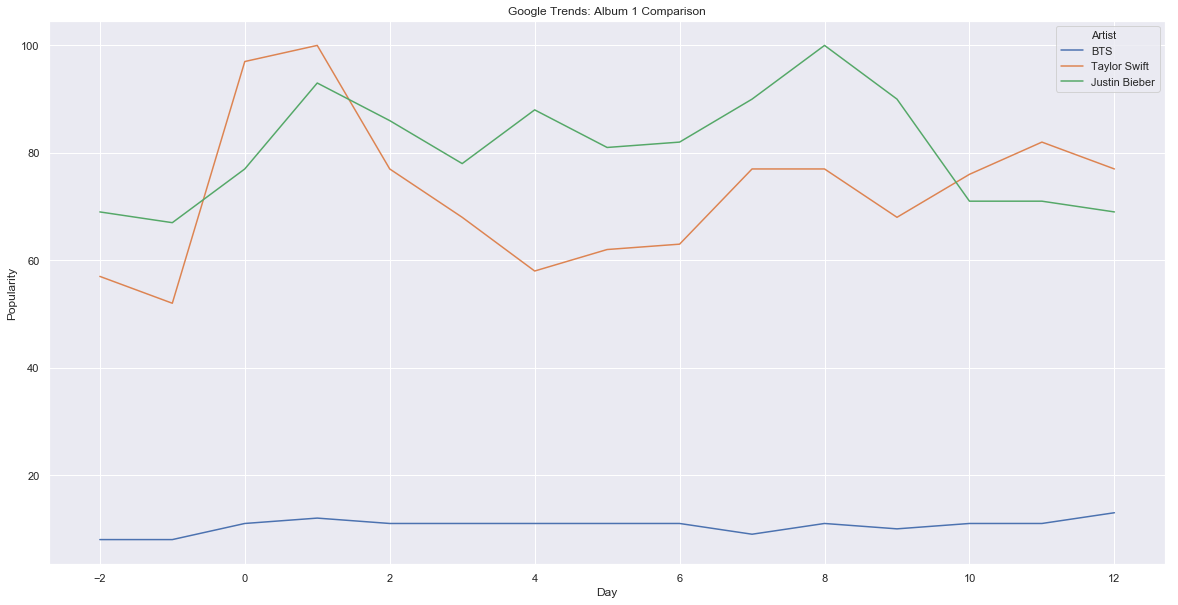

In [49]:
a = sns.lineplot(data = album1, x = 'Day', y = 'Popularity', hue = 'Artist')

a.set_title('Google Trends: Album 1 Comparison')

plt.savefig('graphs/album1.png', dpi=300)

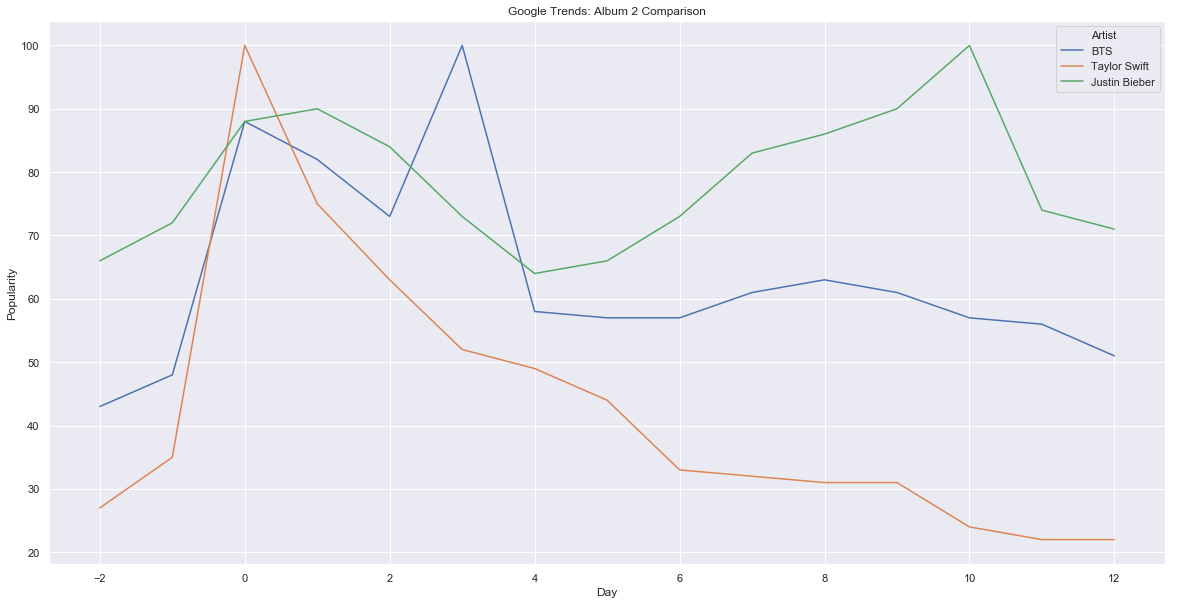

In [50]:
a = sns.lineplot(data = album2, x = 'Day', y = 'Popularity', hue = 'Artist',
            ci = None)

a.set_title('Google Trends: Album 2 Comparison')

plt.savefig('graphs/album2.png', dpi=300)

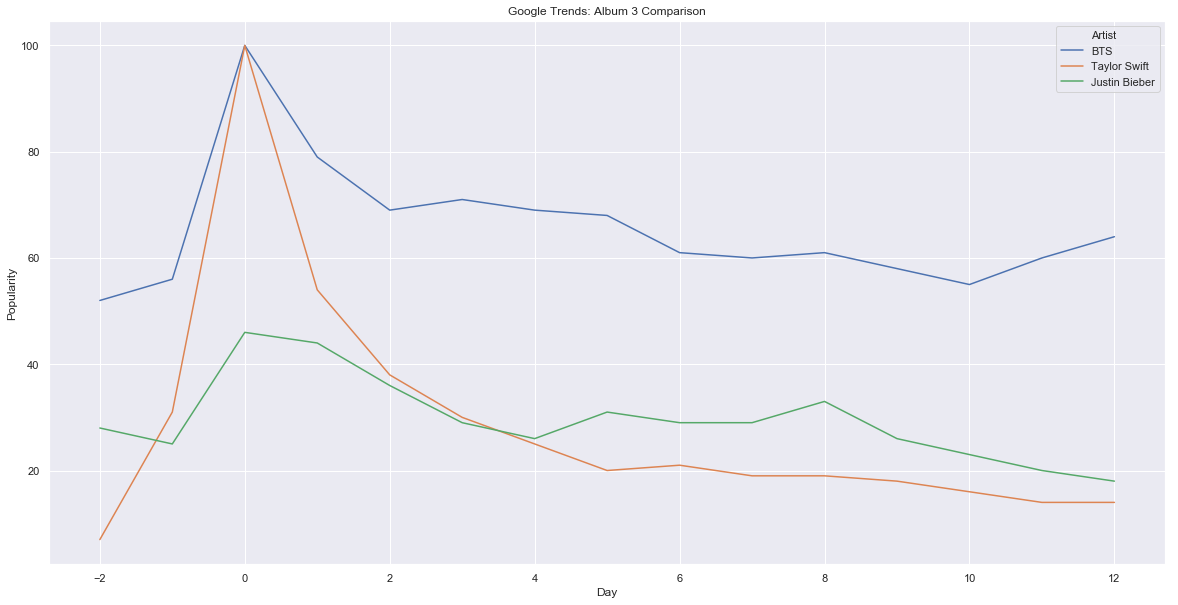

In [51]:
a = sns.lineplot(data = album3, x = 'Day', y = 'Popularity', hue = 'Artist',
            ci = None)

a.set_title('Google Trends: Album 3 Comparison')

plt.savefig('graphs/album3.png', dpi=300)

## Plotly Plotting - Popularity

### Overall Monthly Popularity

In [ ]:
#plot monthly search popularity for entire time frame available
px.line(overall_monthly, x = 'date', y = 'Popularity', color = 'Artist',
        title = 'Monthly Google Search Trends (2014 - Present)')

In [ ]:
px.area(overall_monthly, x = 'date', y = 'Popularity',
        title = 'Monthly Google Search Trends', facet_col = 'Artist',
       facet_col_wrap = 2)

### Timeframe Plotting Popularity

In [ ]:
c = 0

for albums in music_timeframes:
    for dates in albums:
        pytrends.build_payload(kw_list = artists, cat = 3, timeframe = dates) 
        
        ranged = pytrends.interest_over_time()

        ranged.drop('isPartial', inplace = True, axis = 1)
        ranged.reset_index(inplace = True)

        ranged = ranged.melt(id_vars = ['date'],
                            var_name = 'Artist',
                            value_name = 'Popularity')
        
        #labels
        
        date_labels = dates.split(' ')
        date_labels[0] = date_labels[0].replace('-', '/')
        date_labels[1] = date_labels[1].replace('-', '/')
        
        title_text = 'Google Search Trends: ' + artist_albums[c] +\
        ' Album Release (' + date_labels[0] + '-' + date_labels[1] + ')'
        
        
        title_text = 'Google Search Trends: ' + artist_albums[c] +\
        ' Album Release (' + dates + ')'
        
        fig = px.line(ranged, x = 'date', y = 'Popularity',
                      color = 'Artist', title = title_text)   
        
        fig.show()
        
    c += 1

## Plotly Plotting - Regions

In [ ]:
# px.choropleth(regions_w_code, locations="countryCode",
#               color="Taylor Swift",
#               #hover_name="geoName", # column to add to hover information
#               color_continuous_scale=px.colors.sequential.Plasma)

### Related Searches

Let's find the related queries and topics for each artist during their album releases.

In [36]:
bts_topics = pd.DataFrame(columns = ['value','topic_title', 'topic_type', 'date'])
bts_queries = pd.DataFrame(columns = ['value','query','date'])

for bts in bts_timeframes:
    while True:
        try:

            pytrends.build_payload(kw_list = ['BTS'], cat = 3, timeframe = bts)

            #topics
            topics = pytrends.related_topics()

            topt = topics['BTS']['top'][['value', 'topic_title', 'topic_type']]
            topt['date'] = bts

            bts_topics = pd.concat([bts_topics, topt])
            time.sleep(6)

            #queries
            queries = pytrends.related_queries()

            topq = queries['BTS']['top']

            topq['date'] = bts

            bts_queries = pd.concat([bts_queries, topq])
            break
        except:
            time.sleep(12)
            continue

/Users/Casey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
ts_topics = pd.DataFrame(columns = ['value','topic_title', 'topic_type','date'])
ts_queries = pd.DataFrame(columns = ['value','query','date'])

for ts in ts_timeframes:
    while True:
        try:

            pytrends.build_payload(kw_list = ['Taylor Swift'], cat = 3, timeframe = ts)
    
            #topics
            topics = pytrends.related_topics()

            topt = topics['Taylor Swift']['top'][['value', 'topic_title', 'topic_type']]
            topt['date'] = ts

            ts_topics = pd.concat([ts_topics, topt])
            time.sleep(6)

            #queries
            queries = pytrends.related_queries()

            topq = queries['Taylor Swift']['top']
            topq['date'] = ts

            ts_queries = pd.concat([ts_queries, topq])

            break
        except:
            time.sleep(12)
            continue

/Users/Casey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
jb_topics = pd.DataFrame(columns = ['value','topic_title', 'topic_type','date'])
jb_queries = pd.DataFrame(columns = ['value','query','date'])

for jb in jb_timeframes:
    while True:
        try:

            pytrends.build_payload(kw_list = ['Justin Bieber'], cat = 3, timeframe = jb)
    
            #topics
            topics = pytrends.related_topics()

            topt = topics['Justin Bieber']['top'][['value', 'topic_title', 'topic_type']]
            topt['date'] = jb

            jb_topics = pd.concat([jb_topics, topt])
            time.sleep(12)

            #queries
            queries = pytrends.related_queries()

            topq = queries['Justin Bieber']['top']
            topq['date'] = jb

            jb_queries = pd.concat([jb_queries, topq])

            break
        except:
            time.sleep(12)
            continue

/Users/Casey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
artist_words = ['bts', 'taylor', 'swift', 'justin', 'bieber']

def most_common_terms(related):
    try:
        split_search = related['query'].apply(lambda x: x.lower().split())
        com = pd.Series([x for item in split_search\
                         for x in item if x not in stopwords.words()\
                        and x not in artist_words]).value_counts()
        com = com.to_frame('Related Query Term Count')
        
        return com.head(5)
    except:
        split_search = related['topic_title'].apply(lambda x: x.lower().split())
        com = pd.Series([x for item in split_search\
                         for x in item if x not in stopwords.words()\
                        and x not in artist_words]).value_counts()
        com = com.to_frame('Related Topic Term Count')
        
        return com.head(5)

In [110]:
all_related = [bts_queries, bts_topics,
              ts_queries, ts_topics,
              jb_queries, jb_topics]

In [111]:
for rel in all_related:
    display(most_common_terms(rel))

,Related Query Term Count
life,10
lagu,10
love,9
goes,8
lyrics,7


,Related Topic Term Count
awards,4
music,4
language,4
love,4
jungkook,3


,Related Query Term Count
lyrics,11
album,10
1989,6
folklore,6
reputation,6


,Related Topic Term Count
tour,5
reputation,4
1989,3
shake,2
swift's,2


,Related Query Term Count
selena,10
album,9
gomez,9
lyrics,9
love,7


,Related Topic Term Count
love,11
music,8
corden,6
james,6
purpose,6
